In [1]:
from helper_DinoV2_Embeddings import *
from helper_classifier import prepare_data, get_datasets, train_model, evaluate_model
from helper_classifier import DressCategoriesDataset, ClassifierModel

root_path = f"{DATA_PATH}/Zalando_Germany_Dataset/dresses/images/square_images/"

In [2]:
embeddings, df = extract_embeddings()
df, id2label, label2id = prepare_data(df, 'category')
train_dataset, test_dataset = get_datasets(df, embeddings)

Loading embeddings from disk...
14060 embeddings loaded from disk...


### Sanity Check for Embeddings: Nearest Neighbour

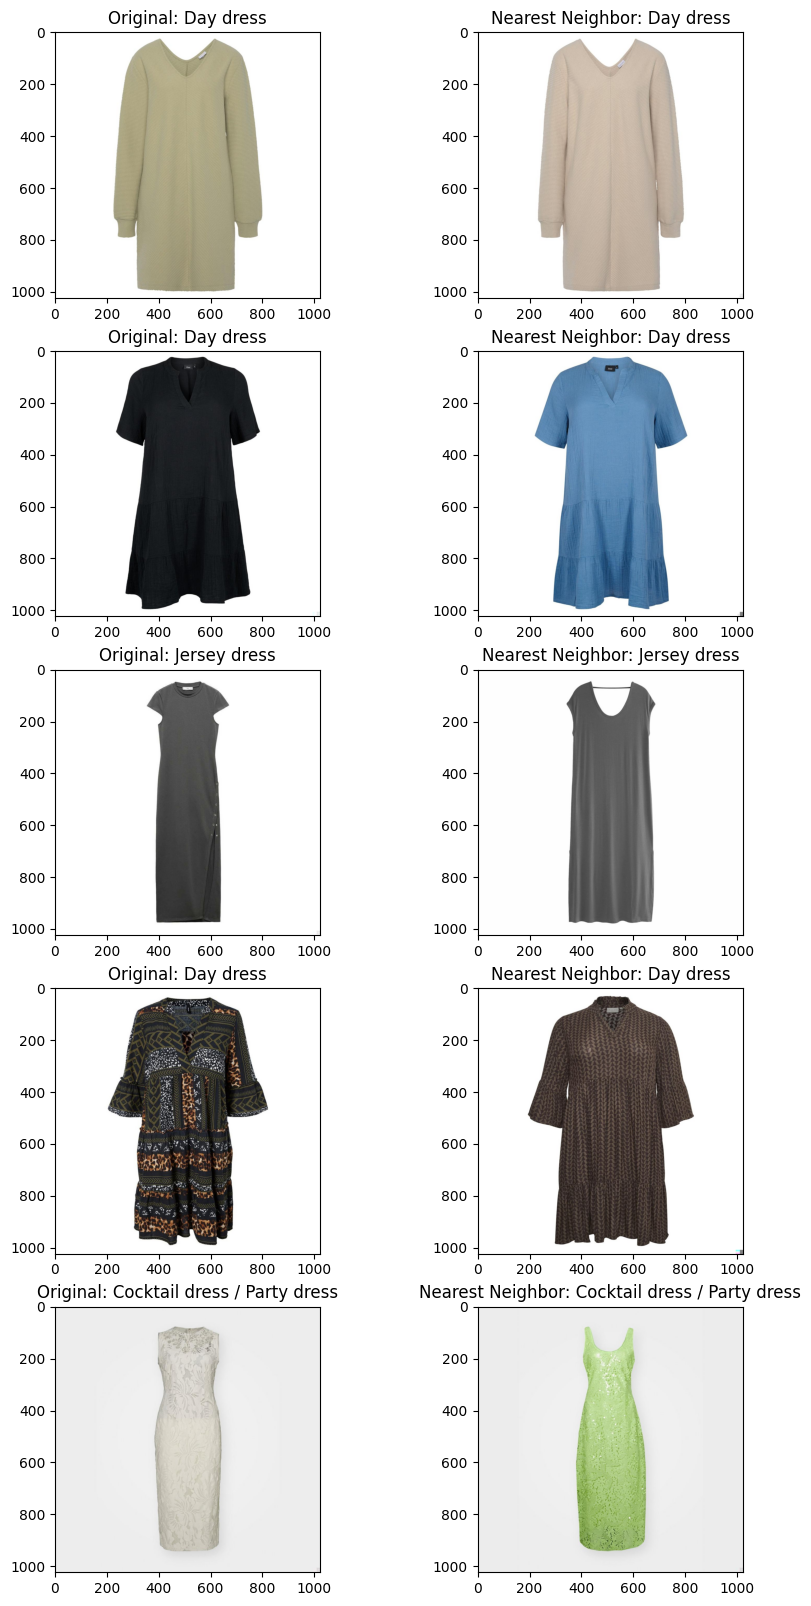

In [3]:
# Visualize Multiple articels and their nearest neighbors
import matplotlib.pyplot as plt
cos = torch.nn.CosineSimilarity(dim=1, eps=1e-6)
num_samples = 5

fig, axs = plt.subplots(num_samples, 2, figsize=(10, 20))
for i in range(num_samples):
    sample = df.sample(1)
    embedding = embeddings[sample.index.item(),:]
    similarity = cos(embeddings, embedding)
    second_highest = torch.argsort(similarity, descending=True)[1].item()
    second_highest_article = df.iloc[second_highest]
    img_path = f"{root_path}{sample.sku.item()}.jpg"
    img = Image.open(img_path)
    axs[i, 0].imshow(img)
    axs[i, 0].set_title(f"Original: {sample.category.item()}")
    img_path = f"{root_path}{second_highest_article.sku}.jpg"
    img = Image.open(img_path)
    axs[i, 1].imshow(img)
    axs[i, 1].set_title(f"Nearest Neighbor: {second_highest_article.category}")